In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load the parquet data
df = pd.read_parquet('train_data.parquet')

# Display the loaded data
print(df.head())


   brand     phase  country  dayweek  month   wd_perc ther_area  \
0  AIMST  0.006284  Aldovia      2.0    1.0  0.045455       NaN   
1  AIMST  0.123459  Aldovia      3.0    1.0  0.090909       NaN   
2  AIMST  0.055607  Aldovia      4.0    1.0  0.136364       NaN   
3  AIMST  0.032148  Aldovia      0.0    1.0  0.181818       NaN   
4  AIMST  0.097054  Aldovia      1.0    1.0  0.227273       NaN   

   hospital_rate  n_nwd_bef  n_nwd_aft  n_weekday_0  n_weekday_1  n_weekday_2  \
0            NaN        4.0        0.0            4            4            5   
1            NaN        0.0        0.0            4            4            5   
2            NaN        0.0        2.0            4            4            5   
3            NaN        2.0        0.0            4            4            5   
4            NaN        0.0        0.0            4            4            5   

   n_weekday_3  n_weekday_4       date  wd  wd_left   monthly main_channel  
0            5            4 2013-

In [4]:
df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,ZVLFE,0.010716,Zamunda,0.0,9.0,0.818182,M,NaN,2.0,0.0,4,4,4,5,5,2016-09-26,18,4,0.010540,NaN
3525878,ZVLFE,0.042210,Zamunda,1.0,9.0,0.863636,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-27,19,3,0.010540,NaN
3525879,ZVLFE,0.051639,Zamunda,2.0,9.0,0.909091,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-28,20,2,0.010540,NaN
3525880,ZVLFE,0.065464,Zamunda,3.0,9.0,0.954545,M,NaN,0.0,0.0,4,4,4,5,5,2016-09-29,21,1,0.010540,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812490 entries, 0 to 3525881
Data columns (total 20 columns):
 #   Column         Dtype         
---  ------         -----         
 0   brand          object        
 1   phase          float64       
 2   country        object        
 3   dayweek        float64       
 4   month          float64       
 5   wd_perc        float64       
 6   ther_area      category      
 7   hospital_rate  float64       
 8   n_nwd_bef      float64       
 9   n_nwd_aft      float64       
 10  n_weekday_0    int64         
 11  n_weekday_1    int64         
 12  n_weekday_2    int64         
 13  n_weekday_3    int64         
 14  n_weekday_4    int64         
 15  date           datetime64[ns]
 16  wd             int64         
 17  wd_left        int64         
 18  monthly        float64       
 19  main_channel   category      
dtypes: category(2), datetime64[ns](1), float64(8), int64(7), object(2)
memory usage: 413.1+ MB


In [6]:
df.isnull().sum()


brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        356445
hospital_rate    504994
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

In [7]:
max_phase_row = df["phase"].idxmax()
df.loc[max_phase_row]

brand                          DKNSS
phase                       0.920948
country                        Dorne
dayweek                          2.0
month                           12.0
wd_perc                          1.0
ther_area                          R
hospital_rate                    0.0
n_nwd_bef                        0.0
n_nwd_aft                       11.0
n_weekday_0                        3
n_weekday_1                        4
n_weekday_2                        4
n_weekday_3                        3
n_weekday_4                        3
date             2020-12-23 00:00:00
wd                                17
wd_left                            0
monthly                     0.049944
main_channel                  RETAIL
Name: 1033200, dtype: object

In [8]:
df['date'].dtypes

dtype('<M8[ns]')

<Axes: xlabel='date', ylabel='phase'>

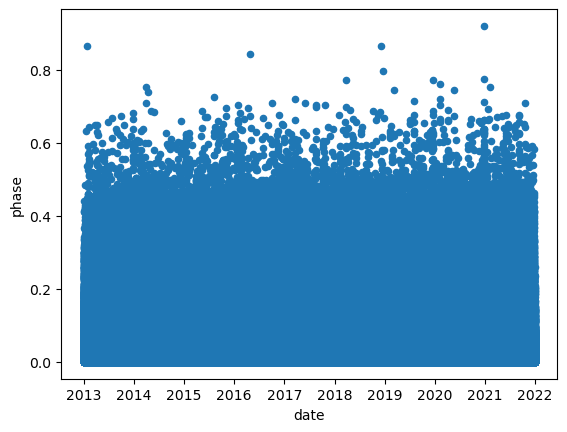

In [9]:
df.plot(x='date', y='phase', kind='scatter')


<Axes: title={'center': 'phase'}, xlabel='date'>

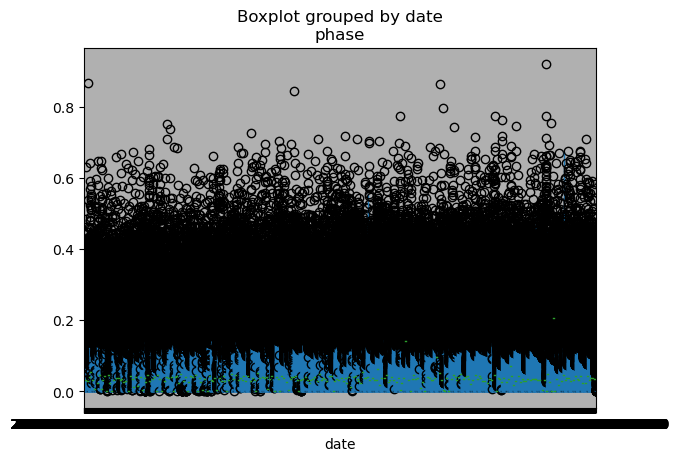

In [10]:
df.boxplot(column='phase', by='date')


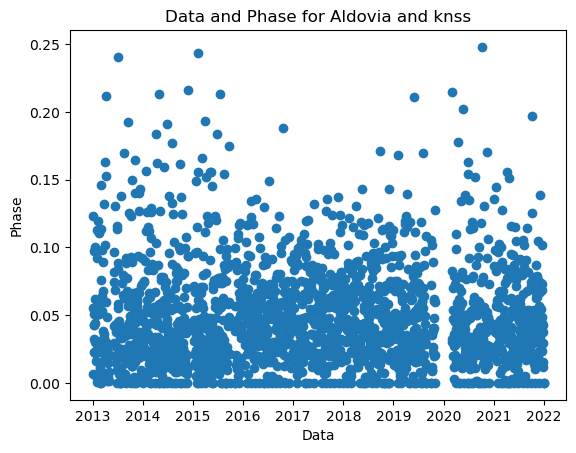

In [11]:


# Filter the dataframe
filtered_df = df[(df['country'] == 'Aldovia') & (df['brand'] == 'AIMST')]

# Plot the data and phase
plt.scatter(filtered_df['date'], filtered_df['phase'])
plt.xlabel('Data')
plt.ylabel('Phase')
plt.title('Data and Phase for Aldovia and knss')
plt.show()

<Axes: title={'center': 'Phase for Aldovia'}, ylabel='Frequency'>

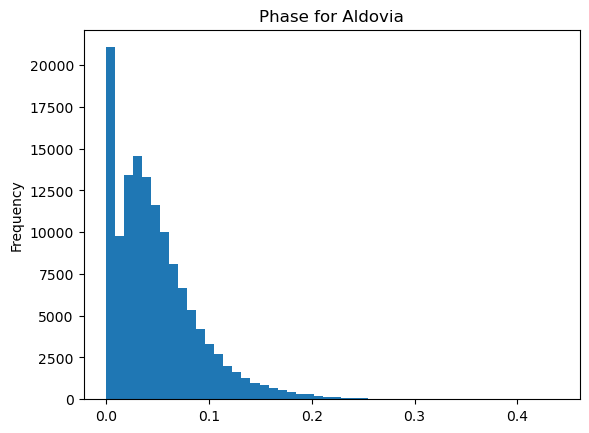

In [12]:
df.loc[df['country'] == 'Aldovia', 'phase'].plot(kind='hist', bins=50, title='Phase for Aldovia')

In [16]:
df[(df['brand'] == 'DKNSS') & (df['country'] == 'Dorne') & (df['date'].dt.year == 2020) & (df['date'].dt.month == 12)]

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
1033184,DKNSS,0.000000,Dorne,1.0,12.0,0.058824,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-01,1,16,0.049944,RETAIL
1033185,DKNSS,0.000000,Dorne,2.0,12.0,0.117647,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-02,2,15,0.049944,RETAIL
1033186,DKNSS,0.000000,Dorne,3.0,12.0,0.176471,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-03,3,14,0.049944,RETAIL
1033187,DKNSS,0.072765,Dorne,4.0,12.0,0.235294,R,0.0,0.0,2.0,3,4,4,3,3,2020-12-04,4,13,0.049944,RETAIL
1033188,DKNSS,0.002625,Dorne,0.0,12.0,0.294118,R,0.0,2.0,0.0,3,4,4,3,3,2020-12-07,5,12,0.049944,RETAIL
1033189,DKNSS,0.003143,Dorne,1.0,12.0,0.352941,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-08,6,11,0.049944,RETAIL
1033190,DKNSS,0.000000,Dorne,2.0,12.0,0.411765,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-09,7,10,0.049944,RETAIL
1033191,DKNSS,0.000000,Dorne,3.0,12.0,0.470588,R,0.0,0.0,0.0,3,4,4,3,3,2020-12-10,8,9,0.049944,RETAIL
1033192,DKNSS,0.000000,Dorne,4.0,12.0,0.529412,R,0.0,0.0,2.0,3,4,4,3,3,2020-12-11,9,8,0.049944,RETAIL
1033193,DKNSS,0.000000,Dorne,0.0,12.0,0.588235,R,0.0,2.0,0.0,3,4,4,3,3,2020-12-14,10,7,0.049944,RETAIL


In [17]:
df['year'] = df['date'].dt.year
df

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,...,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel,year
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,...,4,5,5,4,2013-01-02,1,21,0.008092,NaN,2013
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,...,4,5,5,4,2013-01-03,2,20,0.008092,NaN,2013
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,...,4,5,5,4,2013-01-04,3,19,0.008092,NaN,2013
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,...,4,5,5,4,2013-01-07,4,18,0.008092,NaN,2013
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,...,4,5,5,4,2013-01-08,5,17,0.008092,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525877,ZVLFE,0.010716,Zamunda,0.0,9.0,0.818182,M,NaN,2.0,0.0,...,4,4,5,5,2016-09-26,18,4,0.010540,NaN,2016
3525878,ZVLFE,0.042210,Zamunda,1.0,9.0,0.863636,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-27,19,3,0.010540,NaN,2016
3525879,ZVLFE,0.051639,Zamunda,2.0,9.0,0.909091,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-28,20,2,0.010540,NaN,2016
3525880,ZVLFE,0.065464,Zamunda,3.0,9.0,0.954545,M,NaN,0.0,0.0,...,4,4,5,5,2016-09-29,21,1,0.010540,NaN,2016


I need to check if the phasing adds up to 1 for each month for each country - brand

In [28]:
df_phase = df.groupby(['country', 'brand', 'year', 'month']).agg({'phase': 'sum'})
# Rename the aggregated column
df_phase = df_phase.rename(columns={'phase': 'phase_month'})
df_phase['phase_month'] = df_phase['phase_month'].round(2)
df_phase

phase_month
country brand year month             
Aldovia AIMST 2013 1.0            1.0
                   2.0            1.0
                   3.0            1.0
                   4.0            1.0
                   6.0            1.0
...                               ...
Zamunda ZVLFE 2016 5.0            1.0
                   6.0            1.0
                   7.0            1.0
                   8.0            1.0
                   9.0            1.0

[136807 rows x 1 columns]

In [29]:
df_phase = df_phase.reset_index()
df_phase

,country,brand,year,month,phase_month
0,Aldovia,AIMST,2013,1.0,1.0
1,Aldovia,AIMST,2013,2.0,1.0
2,Aldovia,AIMST,2013,3.0,1.0
3,Aldovia,AIMST,2013,4.0,1.0
4,Aldovia,AIMST,2013,6.0,1.0
...,...,...,...,...,...
136802,Zamunda,ZVLFE,2016,5.0,1.0
136803,Zamunda,ZVLFE,2016,6.0,1.0
136804,Zamunda,ZVLFE,2016,7.0,1.0
136805,Zamunda,ZVLFE,2016,8.0,1.0


In [30]:
len(df_phase['phase_month'].unique())

1

In [31]:
df_phase['phase_month'].unique()

array([1.])